# **The Goal:** 
The goal of this project is to develop a machine learning-based diet recommendation system that provides personalized meal plans by analyzing key health-related inputs. Instead of analyzing full dietary patterns, the system focuses on essential factors that directly influence nutrition.

Specifically, this project aims to:
 1. Classify users into suitable diet categories based on their age, BMI, calorie needs, gender, health condition, and activity level.
 2. Provide personalized diet recommendations that align with each user’s health status and nutritional needs.
 3. Improve accessibility to dietary guidance through an AI-driven system that simplifies the meal planning process.
 4. Promote healthier eating habits by offering practical and customized nutritional advice.

By utilizing machine learning, this system ensures that users receive accurate and relevant diet suggestions without requiring extensive dietary history analysis.
# **The source of the dataset:** 
https://www.kaggle.com/datasets/ziya07/diet-recommendations-dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

In [3]:
# Load the dataset
dataset = pd.read_csv('diet_recommendations_dataset.csv')

# **General information:**


In [4]:
num_rows, num_columns = dataset.shape
data_types = dataset.dtypes
summary_info = dataset.info()

# Display extracted information
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")
print("\nColumn Data Types:")
print(data_types)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Patient_ID                        1000 non-null   object 
 1   Age                               1000 non-null   int64  
 2   Gender                            1000 non-null   object 
 3   Weight_kg                         1000 non-null   float64
 4   Height_cm                         1000 non-null   int64  
 5   BMI                               1000 non-null   float64
 6   Disease_Type                      796 non-null    object 
 7   Severity                          1000 non-null   object 
 8   Physical_Activity_Level           1000 non-null   object 
 9   Daily_Caloric_Intake              1000 non-null   int64  
 10  Cholesterol_mg/dL                 1000 non-null   float64
 11  Blood_Pressure_mmHg               1000 non-null   int64  
 12  Glucose

In [5]:
print("Classes:", dataset["Diet_Recommendation"].unique()) # Display unique diet recommendations (classes)

print("Class distribution:\n", dataset["Diet_Recommendation"].value_counts()) # Display the count of each class

Classes: ['Balanced' 'Low_Carb' 'Low_Sodium']
Class distribution:
 Diet_Recommendation
Balanced      426
Low_Sodium    316
Low_Carb      258
Name: count, dtype: int64


# **Summary of the dataset:**

In [6]:
display(dataset.head(10)) #to provide sample of the dataset (first 10 record)

,Patient_ID,Age,Gender,Weight_kg,Height_cm,BMI,Disease_Type,Severity,Physical_Activity_Level,Daily_Caloric_Intake,Cholesterol_mg/dL,Blood_Pressure_mmHg,Glucose_mg/dL,Dietary_Restrictions,Allergies,Preferred_Cuisine,Weekly_Exercise_Hours,Adherence_to_Diet_Plan,Dietary_Nutrient_Imbalance_Score,Diet_Recommendation
0,P0001,56,Male,58.4,160,22.8,Obesity,Moderate,Moderate,3079,173.3,133,116.3,NaN,Peanuts,Mexican,3.1,96.6,3.1,Balanced
1,P0002,69,Male,101.2,169,35.4,Diabetes,Mild,Moderate,3032,199.2,120,137.1,NaN,Peanuts,Chinese,4.5,63.2,0.6,Low_Carb
2,P0003,46,Female,63.5,173,21.2,Hypertension,Mild,Sedentary,1737,181.0,121,109.6,NaN,Peanuts,Chinese,3.8,57.5,4.6,Low_Sodium
3,P0004,32,Male,58.1,164,21.6,NaN,Mild,Moderate,2657,168.2,144,159.4,NaN,NaN,Mexican,4.3,54.5,0.4,Balanced
4,P0005,60,Male,79.5,197,20.5,Diabetes,Moderate,Sedentary,3496,200.4,172,182.3,Low_Sugar,NaN,Italian,9.8,78.2,4.7,Low_Carb
5,P0006,25,Female,105.7,156,43.4,Obesity,Severe,Active,2715,182.3,177,108.9,NaN,Gluten,Indian,0.9,55.7,3.5,Balanced
6,P0007,78,Male,102.2,170,35.4,NaN,Mild,Active,2879,175.8,166,95.1,NaN,Gluten,Chinese,9.2,56.9,1.6,Balanced
7,P0008,38,Male,53.8,191,14.7,Diabetes,Severe,Moderate,1777,196.4,122,85.1,Low_Sodium,Gluten,Italian,4.8,65.0,2.0,Low_Carb
8,P0009,56,Male,81.9,175,26.7,Obesity,Severe,Active,2541,163.3,132,150.1,NaN,NaN,Indian,6.2,64.1,3.7,Balanced
9,P0010,75,Male,86.6,193,23.2,Hypertension,Moderate,Active,2023,242.8,148,127.7,Low_Sodium,NaN,Indian,8.3,80.2,3.0,Low_Sodium


## Summary statistics for numerical columns

In [7]:
# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Data:")
print(dataset.describe())


Summary Statistics for Numerical Data:
               Age    Weight_kg   Height_cm          BMI  \
count  1000.000000  1000.000000  1000.00000  1000.000000   
mean     49.857000    84.602400   174.81700    28.191600   
std      18.114267    20.088121    14.33377     8.040136   
min      18.000000    50.000000   150.00000    13.000000   
25%      35.000000    66.600000   162.00000    22.075000   
50%      50.000000    85.200000   175.00000    27.450000   
75%      66.000000   102.000000   187.00000    33.425000   
max      79.000000   119.700000   199.00000    52.400000   

       Daily_Caloric_Intake  Cholesterol_mg/dL  Blood_Pressure_mmHg  \
count           1000.000000        1000.000000          1000.000000   
mean            2475.064000         199.717900           144.993000   
std              565.017032          29.080614            20.245712   
min             1500.000000         150.400000           110.000000   
25%             1984.750000         174.300000           128.000

## Gender distribution:

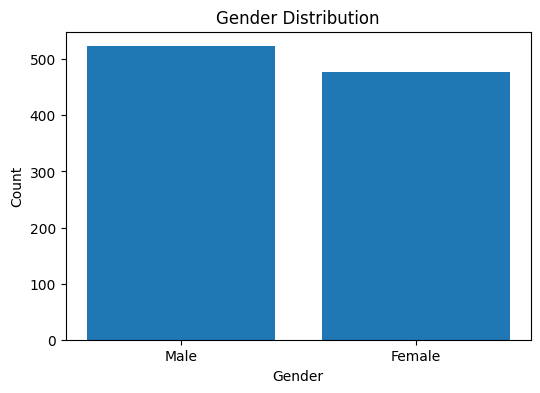

In [11]:
gender_counts = dataset['Gender'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

## Disease types Distribution

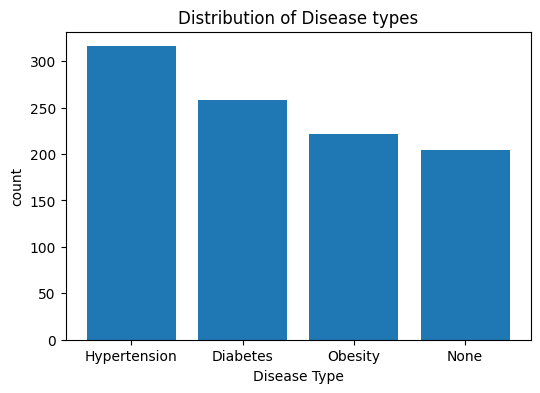

In [12]:
Disease_counts = dataset['Disease_Type'].value_counts(dropna=False)
Disease_counts.index = Disease_counts.index.fillna('None')
plt.figure(figsize=(6, 4))
plt.bar(Disease_counts.index, Disease_counts.values)
plt.xlabel('Disease Type')
plt.ylabel('count')
plt.title('Distribution of Disease types')
plt.show()

## Age distribution

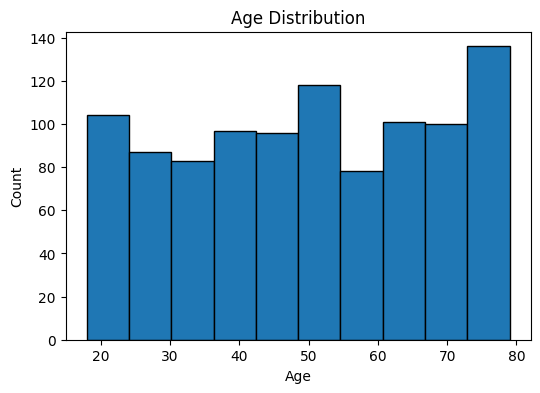

In [9]:
plt.figure(figsize=(6, 4))
plt.hist(dataset['Age'], bins=10 , edgecolor='black') 
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

## BMI Distribution 

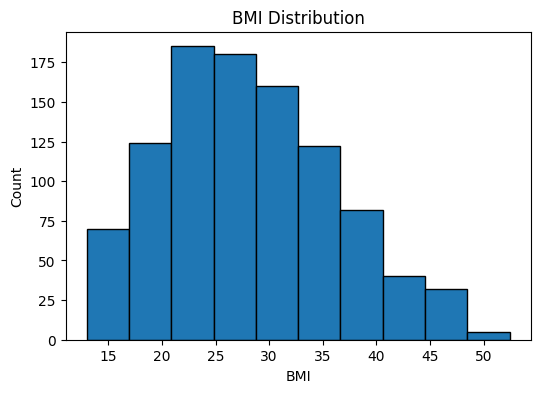

In [10]:
plt.figure(figsize=(6, 4))
plt.hist(dataset['BMI'], bins=10,  edgecolor='black') 
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('BMI Distribution')
plt.show()

## Physical Activity Level Distribution

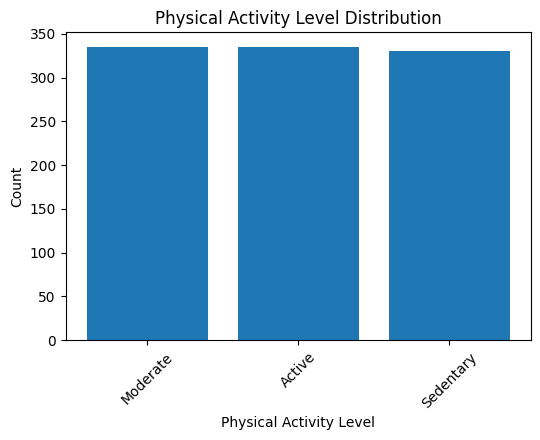

In [11]:
activity_counts = dataset['Physical_Activity_Level'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(activity_counts.index, activity_counts.values)
plt.xticks(ticks=range(len(activity_counts.index)), labels=activity_counts.index, rotation=45)
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')
plt.title('Physical Activity Level Distribution')
plt.show()

## Diet Recommendation Distribution

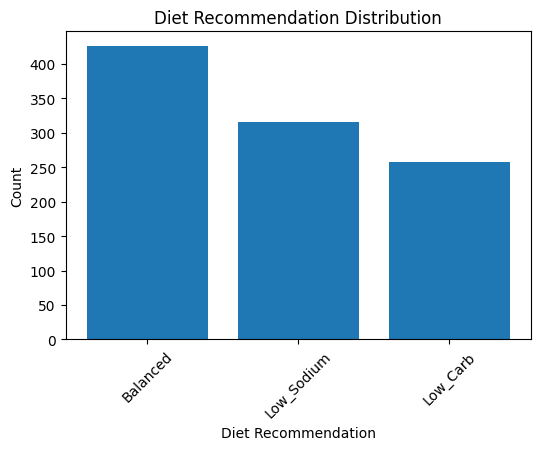

In [12]:
diet_counts = dataset['Diet_Recommendation'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(diet_counts.index, diet_counts.values)
plt.xticks(ticks=range(len(diet_counts.index)), labels=diet_counts.index, rotation=45)
plt.xlabel('Diet Recommendation')
plt.ylabel('Count')
plt.title('Diet Recommendation Distribution')
plt.show()

# **Preprocessing techniques:**

# **Binning:** 
Binning is the process of converting continuous numerical values into discrete categories (ranges). 

Binning simplifies data by grouping similar values together, reducing the complexity of continuous variables like age, BMI, and daily caloric intake. This helps in minimizing noise by generalizing values into broader categories, making patterns more apparent. Additionally, it enhances interpretability, as many machine learning models and analytical approaches perform better with categorical data rather than raw numerical values.

## Binning Age

In [14]:
bins = list(range(10, 81, 10))  
labels = [f"{i}-{i+10}" for i in bins[:-1]]  # Labels like "10-20", "20-30"

dataset['Age_Range'] = pd.cut(dataset['Age'], bins=bins, labels=labels, right=False)

## Binning BMI

In [15]:
bmi_bins = list(range(0, 71, 10))  # [0,10,20,...,70]
bmi_labels = [f"{i}-{i+10}" for i in range(0, 70, 10)]  # Adjust labels count
dataset["BMI_Range"] = pd.cut(dataset["BMI"], bins=bmi_bins, labels=bmi_labels, right=False)

## Binning Daily Caloric Intake

In [16]:
calorie_bins = list(range(0, 6001, 1000))  # [0,1000,2000,...,6000]
calorie_labels = [f"{i}-{i+1000}" for i in range(0, 6000, 1000)]
dataset["Calorie_Range"] = pd.cut(dataset["Daily_Caloric_Intake"], bins=calorie_bins, labels=calorie_labels, right=False)

# Drop some culomns

In the provided code, specific columns are dropped to streamline the dataset by removing irrelevant, redundant, or noisy features that could hinder model performance. The **Patient_ID** column is dropped as it is an identifier and does not contribute meaningful information. The **Age** column is removed after applying binning to group ages into meaningful categories. **Weight_kg and Height_cm** are excluded since they are used to calculate **BMI**, and only the binned BMI values are retained to simplify the inputs. The remaining columns, such as **Daily_Caloric_Intake, Cholesterol_mg/dL, Blood_Pressure_mmHg, Glucose_mg/dL, Dietary_Restrictions, Allergies, Preferred_Cuisine, Weekly_Exercise_Hours, Adherence_to_Diet_Plan, Dietary_Nutrient_Imbalance_Score**, were determined to either add noise or lack direct relevance to the dataset’s objectives. This process ensures the dataset remains focused and efficient for analysis.

In [16]:
dataset = dataset.drop(columns=["Patient_ID", "Age", "Weight_kg", "Height_cm", "BMI", "Severity", "Daily_Caloric_Intake", "Cholesterol_mg/dL", "Blood_Pressure_mmHg", "Glucose_mg/dL", "Dietary_Restrictions", "Allergies", "Preferred_Cuisine", "Weekly_Exercise_Hours", "Adherence_to_Diet_Plan", "Dietary_Nutrient_Imbalance_Score"])

# Encode categorical

Encoding categorical data refers to the process of converting categorical variables into numerical formats so they can be used in machine learning models, which typically require numerical inputs. This transformation is crucial for improving model interpretability, ensuring compatibility with mathematical operations, and enhancing computational efficiency. Effective encoding methods help prevent misleading relationships, reduce dimensionality when necessary, and optimize feature representation for better predictive performance. Selecting the right encoding technique depends on the nature of the categorical data and the type of machine learning model being used.
## Label Encoding
Label encoding is a simple and efficient method for converting categorical variables into numerical values by assigning a unique integer to each category. It was applied to several columns in our dataset: 
**Gender was encoded as** 
0 for female and 
1 for male, 
**Disease Type as** 
0 for Diabetes,
1 for Hypertension, 
2 for Obesity, 
and 3 for none, 
**Activity Level as** 
0 for Active
1 for Moderate, 
and 2 for Sedentary, 
**Diet Recommendation as** 
0 for Balanced, 
1 for Low Carb, 
and 2 for Low Sodium. 
This approach is particularly useful as it is easy to implement, memory-efficient, and preserves relationships between categories when applicable, ensuring the categorical data is compatible with machine learning models.

In [17]:
# Initialize LabelEncoder
le = LabelEncoder()

# Encoding categorical columns
dataset['Gender'] = le.fit_transform(dataset['Gender'])
dataset['Disease_Type'] = le.fit_transform(dataset['Disease_Type'])
dataset['Physical_Activity_Level'] = le.fit_transform(dataset['Physical_Activity_Level'])
dataset['Diet_Recommendation'] = le.fit_transform(dataset['Diet_Recommendation'])

## Ordinal Encoding


In [17]:
ordinal_features = ['Age_Range', 'BMI_Range', 'Calorie_Range']
ordinal_encoder = OrdinalEncoder()
dataset[ordinal_features] = ordinal_encoder.fit_transform(dataset[ordinal_features]).astype(int)

### **Export**

In [18]:
dataset.to_csv('dataset_preprocessed.csv', index=False)